In [ ]:
!pip install pygame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# GOMOKU ENVIRONMENT

In [ ]:
import itertools
import pygame
import random
import numpy as np

class GomokuPosition:
    dirs = (
        ((0, -1), (0, 1)), 
        ((1, 0), (-1, 0)),
        ((1, 1), (-1, -1)),
        ((1, -1), (-1, 1)),
    )

    def __init__(self, rows, cols, n_to_win, players="wb", blank="."):
        self.ply = 0
        self.rows = rows
        self.cols = cols
        self.last_move = None
        self.n_to_win = n_to_win
        self.boards = [[[0] * cols for _ in range(rows)] for i in range(2)]
        self.players = players
        self.blank = blank

    def board(self, row=None, col=None):
        if row is None and col is None:
            return self.boards[self.ply&1]
        elif col is None:
            return self.boards[self.ply&1][row]

        return self.boards[self.ply&1][row][col]

    def move(self, row, col):
        if self.in_bounds(row, col) and self.is_empty(row, col):
            self.board(row)[col] = 1
            self.ply += 1
            self.last_move = row, col
            return True

        return False

    def is_empty(self, row, col):
        return not any(board[row][col] for board in self.boards)

    def in_bounds(self, y, x):
        return y >= 0 and y < self.rows and x >= 0 and x < self.cols

    def count_from_last_move(self, dy, dx):
        if not self.last_move:
            return 0

        last_board = self.boards[(self.ply-1)&1]
        y, x = self.last_move
        run = 0

        while self.in_bounds(y, x) and last_board[y][x]:
            run += 1
            x += dx
            y += dy
        
        return run

    def just_won(self):
        return self.ply >= self.n_to_win * 2 - 1 and any(
            (self.count_from_last_move(*x) + 
             self.count_from_last_move(*y) - 1 >= self.n_to_win)
            for x, y in self.dirs
        )
        
    def is_draw(self):
        return self.ply >= self.rows * self.cols and not self.just_won()

    def last_player(self):
        if self.ply < 1:
            raise IndexError("no moves have been made")

        return self.players[(self.ply-1)&1]

    def char_for_cell(self, row, col):
        for i, char in enumerate(self.players):
            if self.boards[i][row][col]:
                # return char

                if char == 'w':
                  return 1
                else:
                  return -1
        
        # return self.blank
        return 0

    def to_grid(self):
        return [
            [self.char_for_cell(row, col) for col in range(self.cols)]
            for row in range(self.rows)
        ]

    def __repr__(self):
        return "\n".join([" ".join(row) for row in self.to_grid()])

    def __str__(self):
        return "\n".join([" ".join(row) for row in self.to_grid()])
    

    # NEW CODE



# if __name__ == "__main__":
#     pos = GomokuPosition(rows=4, cols=4, n_to_win=3)

#     while not pos.just_won() and not pos.is_draw():self.boards
#         print(pos, "\n")

#         try:
#             if not pos.move(*map(int, input("[row col] :: ").split())):
#                 print("try again")
#         except (ValueError, IndexError):
#             print("try again")

#     print(pos, "\n")
        
#     if pos.just_won():
#         print(pos.last_player(), "won")
#     else:
#         print("draw")



class Colors:
    BLACK = 0, 0, 0
    WHITE = 255, 255, 255
    BROWN = 205, 128, 0


class Gomoku:
    def __init__(
        self,
        size=60,
        piece_size=20,
        rows=15,
        cols=15,
        n_to_win=5,
        caption="Gomoku"
    ):
        self.rows = rows
        self.cols = cols
        self.w = rows * size
        self.h = cols * size
        self.size = size
        self.piece_size = piece_size
        self.half_size = size // 2
        self.matrix = rows * cols

        self.n_to_win = n_to_win

        pygame.init()
        # pygame.display.set_caption(caption)
        # self.screen = pygame.display.set_mode((self.w, self.h))
        # self.screen.fill(Colors.WHITE)
        self.player_colors = {"w": Colors.WHITE, "b": Colors.BLACK}
        self.player_names = {"w": "White", "b": "Black"}

        self.reset()
        # self.board = GomokuPosition(rows, cols, n_to_win)
        # self.draw_board()

    # FOR AI
    def reset(self):
        self.board = GomokuPosition(self.rows, self.cols, self.n_to_win)
        self.draw_board()

    def Board(self):
        return np.asarray(self.board.to_grid())
  

    def get_state(self):
        state = self.Board()
        state = state.reshape(-1)
        return state

    def take_action(self, index):
        
        x, y = self.index_1D_to_2D(index)

        # for event in pygame.event.get():
        #     if event.type == pygame.QUIT:
        #         pygame.quit()
        #         return
        
        # TODO AI TURN
        # if self.board.last_player() != ai:
        # move        
        # self.action(act)
        
        done = False
        # reward = -1

        # self.play_step((x,y))

        # print(self.board.is_empty(x,y))

        if self.board.is_empty(x,y):

            self.action((x,y))
            reward = -1

        else:
            reward = -20
                    

        if self.board.just_won():
            reward = 100
            done = True

        if self.board.is_draw():
            reward = 0
            done = True

        return reward, done

    def index_2D_to_1D(self, act):
      x, y = act
      return y + self.cols*x
      
    def index_1D_to_2D(self, index):
      y = index % self.cols
      x = int(index / self.cols)

      return x,y

    #ENDS HERE


    def row_lines(self):
        half = self.half_size

        for y in range(half, self.h - half + self.size, self.size):
            yield (half, y), (self.w - half, y)

    def col_lines(self):
        half = self.half_size

        for x in range(half, self.w - half + self.size, self.size):
            yield (x, half), (x, self.h - half)
        
    def draw_background(self):
        rect = pygame.Rect(0, 0, self.w, self.h)
        # pygame.draw.rect(self.screen, Colors.BROWN, rect)

    def draw_lines(self):
        lines = itertools.chain(self.col_lines(), self.row_lines())

        # for start, end in lines:
        #     pygame.draw.line(
        #         self.screen, 
        #         Colors.BLACK, 
        #         start, 
        #         end, 
        #         width=2
        #     )

    def draw_board(self):
        self.draw_background()
        self.draw_lines()
        
    def draw_piece(self, row, col):
        player = self.board.last_player()
        circle_pos = (
           col * self.size + self.half_size, 
           row * self.size + self.half_size,
        )
        pygame.draw.circle(
           self.screen, 
           self.player_colors[player], 
           circle_pos, 
           self.piece_size
        )

    def show_outcome(self):
        player = self.player_names[self.board.last_player()]
        msg = "draw!" if self.board.is_draw() else f"{player} wins!"
        font_size = self.w // 10
        font = pygame.font.Font("freesansbold.ttf", font_size)
        label = font.render(msg, True, Colors.WHITE, Colors.BLACK)
        x = self.w // 2 - label.get_width() // 2
        y = self.h // 2 - label.get_height() // 2
        self.screen.blit(label, (x, y))

    def exit_on_click(self):
        while True:
            for event in pygame.event.get():
                if (event.type == pygame.QUIT or 
                        event.type == pygame.MOUSEBUTTONDOWN):
                    pygame.quit()
                    return

    def make_move(self, x, y):
        col = x // self.size
        row = y // self.size
        print(row,col)
        if self.board.move(row, col):
            self.draw_piece(row, col)
        
    def play(self):
        pygame.time.Clock().tick(10)
        # self.draw_board()
        pygame.display.update()
        while not self.board.just_won() and not self.board.is_draw():
            for event in pygame.event.get():
                if event.type == pygame.QUIT:
                    pygame.quit()
                    return
                elif event.type == pygame.MOUSEBUTTONDOWN:
                    self.make_move(*event.pos)
                    pygame.display.update()                        
                    print(self.board)
                    print(self.board.last_player())
                    print(self.board.just_won())

        self.show_outcome()
        pygame.display.update()
        self.exit_on_click()

    def action(self, act):
        x, y = act
        if self.board.move(x, y):
            player = self.board.last_player()
            circle_pos = (
            y * self.size + self.half_size, 
            x * self.size + self.half_size,
            )
            # pygame.draw.circle(
            # self.screen, 
            # self.player_colors[player], 
            # circle_pos, 
            # self.piece_size
            # )

        # self.make_move(x, y)



if __name__ == "__main__":
    games = Gomoku(rows=5, cols=5, n_to_win=3)
    games.action((1,5))
    games.action((2,5))
    games.action((1,4))
    games.action((2,4))
    games.action((1,3))    
    games.action((2,3))
    # game.reset()
    print(games.Board())
    # game.play()

[[ 0  0  0  0  0]
 [ 0  0  0  1  1]
 [ 0  0  0 -1 -1]
 [ 0  0  0  0  0]
 [ 0  0  0  0  0]]


# HELPER PLOT FUNCTION

In [ ]:
import matplotlib.pyplot as plt
from IPython import display

plt.ion()

def plot_as(scores1): # mean_scores1)
    
    display.clear_output(wait=True)
    display.display(plt.gcf())
    plt.clf()
    
    plt.title('Training...')
    plt.xlabel('Number of Games')
    
    plt.ylabel('Move Taken')
    plt.plot(scores1, label = 'Move taken/ game')
    # plt.plot(mean_scores1, label = 'Average move taken/ game')


    # plt.plot(reward, label = 'reward')


    plt.ylim(ymin=0)
    # plt.legend()
    plt.text(len(scores1)-1, scores1[-1], str(scores1[-1]))
    # plt.text(len(mean_scores1)-1, mean_scores1[-1], str(mean_scores1[-1]))

    # plt.text(len(reward)-1, reward[-1], str(reward[-1]))

    plt.show(block=False)
    plt.pause(.1)

# ACTOR CRITIC

In [ ]:
import os
import numpy as np
import torch as T
import torch.nn as nn
import torch.optim as optim
from torch.distributions.categorical import Categorical

class PPOMemory:
    def __init__(self, batch_size):
        self.states = []
        self.probs = []
        self.vals = []
        self.actions = []
        self.rewards = []
        self.dones = []

        self.batch_size = batch_size

    def generate_batches(self):
        n_states = len(self.states)
        batch_start = np.arange(0, n_states, self.batch_size)
        indices = np.arange(n_states, dtype=np.int64)
        np.random.shuffle(indices)
        batches = [indices[i:i+self.batch_size] for i in batch_start]

        return np.array(self.states),\
                np.array(self.actions),\
                np.array(self.probs),\
                np.array(self.vals),\
                np.array(self.rewards),\
                np.array(self.dones),\
                batches

    def store_memory(self, state, action, probs, vals, reward, done):
        self.states.append(state)
        self.actions.append(action)
        self.probs.append(probs)
        self.vals.append(vals)
        self.rewards.append(reward)
        self.dones.append(done)

    def clear_memory(self):
        self.states = []
        self.probs = []
        self.actions = []
        self.rewards = []
        self.dones = []
        self.vals = []

class ActorNetwork(nn.Module):
    def __init__(self, n_actions, input_dims, alpha,
            fc1_dims=256, fc2_dims=256, chkpt_dir='tmp/ppo/actor'):
        super(ActorNetwork, self).__init__()

        self.chkpt_dir = chkpt_dir
        
        # self.checkpoint_file = os.path.join(chkpt_dir, 'actor_torch_ppo')

        self.actor = nn.Sequential(
                nn.Linear(input_dims, fc1_dims),
                nn.ReLU(),
                nn.Linear(fc1_dims, fc2_dims),
                nn.ReLU(),
                nn.Linear(fc2_dims, n_actions),
                nn.Softmax(dim=-1)
        )

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        dist = self.actor(state)
        dist = Categorical(dist)
        
        return dist

    def save_checkpoint(self, file_name='actor.pth'):
        model_folder_path = self.chkpt_dir
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        T.save(self.state_dict(), file_name)

    def load_checkpoint(self, file_name='actor.pth'):

        file_name = os.path.join(self.chkpt_dir, file_name)
        self.load_state_dict(T.load(file_name))
    

    # def save_checkpoint(self):
    #     T.save(self.state_dict(), self.checkpoint_file)

    # def load_checkpoint(self):
    #     self.load_state_dict(T.load(self.checkpoint_file))

class CriticNetwork(nn.Module):
    def __init__(self, input_dims, alpha, fc1_dims=256, fc2_dims=256,
            chkpt_dir='tmp/ppo/critic'):
        super(CriticNetwork, self).__init__()

        self.chkpt_dir = chkpt_dir
        # self.checkpoint_file = os.path.join(chkpt_dir, 'critic_torch_ppo')
        self.critic = nn.Sequential(
                nn.Linear(input_dims, fc1_dims),
                nn.ReLU(),
                nn.Linear(fc1_dims, fc2_dims),
                nn.ReLU(),
                nn.Linear(fc2_dims, 1)
        )

        self.optimizer = optim.Adam(self.parameters(), lr=alpha)
        self.device = T.device('cuda:0' if T.cuda.is_available() else 'cpu')
        self.to(self.device)

    def forward(self, state):
        value = self.critic(state)

        return value

    def save_checkpoint(self, file_name='critic.pth'):
        model_folder_path = self.chkpt_dir
        if not os.path.exists(model_folder_path):
            os.makedirs(model_folder_path)

        file_name = os.path.join(model_folder_path, file_name)
        T.save(self.state_dict(), file_name) 

    def load_checkpoint(self, file_name='critic.pth'):

        file_name = os.path.join(self.chkpt_dir, file_name)
        self.load_state_dict(T.load(file_name))

    # def save_checkpoint(self):
    #     T.save(self.state_dict(), self.checkpoint_file)

    # def load_checkpoint(self):
    #     self.load_state_dict(T.load(self.checkpoint_file))

class Agent:
    def __init__(self, n_actions, input_dims, gamma=0.99, alpha=0.0003, gae_lambda=0.95,
            policy_clip=0.2, batch_size=64, n_epochs=10):
        self.gamma = gamma
        self.policy_clip = policy_clip
        self.n_epochs = n_epochs
        self.gae_lambda = gae_lambda

        self.actor = ActorNetwork(n_actions, input_dims, alpha)
        self.critic = CriticNetwork(input_dims, alpha)
        self.memory = PPOMemory(batch_size)
       
    def remember(self, state, action, probs, vals, reward, done):
        self.memory.store_memory(state, action, probs, vals, reward, done)

    def save_models(self):
        print('... saving models ...')
        self.actor.save_checkpoint()
        self.critic.save_checkpoint()

    def load_models(self):
        print('... loading models ...')
        self.actor.load_checkpoint()
        self.critic.load_checkpoint()

    def choose_action(self, observation):
        state = T.tensor([observation], dtype=T.float).to(self.actor.device)

        dist = self.actor(state)
        value = self.critic(state)
        action = dist.sample()

        probs = T.squeeze(dist.log_prob(action)).item()
        action = T.squeeze(action).item()
        value = T.squeeze(value).item()

        return action, probs, value

    def learn(self):
        for _ in range(self.n_epochs):
            state_arr, action_arr, old_prob_arr, vals_arr,\
            reward_arr, dones_arr, batches = \
                    self.memory.generate_batches()

            values = vals_arr
            advantage = np.zeros(len(reward_arr), dtype=np.float32)

            for t in range(len(reward_arr)-1):
                discount = 1
                a_t = 0
                for k in range(t, len(reward_arr)-1):
                    a_t += discount*(reward_arr[k] + self.gamma*values[k+1]*\
                            (1-int(dones_arr[k])) - values[k])
                    discount *= self.gamma*self.gae_lambda
                advantage[t] = a_t
            advantage = T.tensor(advantage).to(self.actor.device)

            values = T.tensor(values).to(self.actor.device)
            for batch in batches:
                states = T.tensor(state_arr[batch], dtype=T.float).to(self.actor.device)
                old_probs = T.tensor(old_prob_arr[batch]).to(self.actor.device)
                actions = T.tensor(action_arr[batch]).to(self.actor.device)

                dist = self.actor(states)
                critic_value = self.critic(states)

                critic_value = T.squeeze(critic_value)

                new_probs = dist.log_prob(actions)
                prob_ratio = new_probs.exp() / old_probs.exp()
                #prob_ratio = (new_probs - old_probs).exp()
                weighted_probs = advantage[batch] * prob_ratio
                weighted_clipped_probs = T.clamp(prob_ratio, 1-self.policy_clip,
                        1+self.policy_clip)*advantage[batch]
                actor_loss = -T.min(weighted_probs, weighted_clipped_probs).mean()

                returns = advantage[batch] + values[batch]
                critic_loss = (returns-critic_value)**2
                critic_loss = critic_loss.mean()

                total_loss = actor_loss + 0.5*critic_loss
                self.actor.optimizer.zero_grad()
                self.critic.optimizer.zero_grad()
                total_loss.backward()
                self.actor.optimizer.step()
                self.critic.optimizer.step()

        self.memory.clear_memory()               


<Figure size 640x480 with 0 Axes>

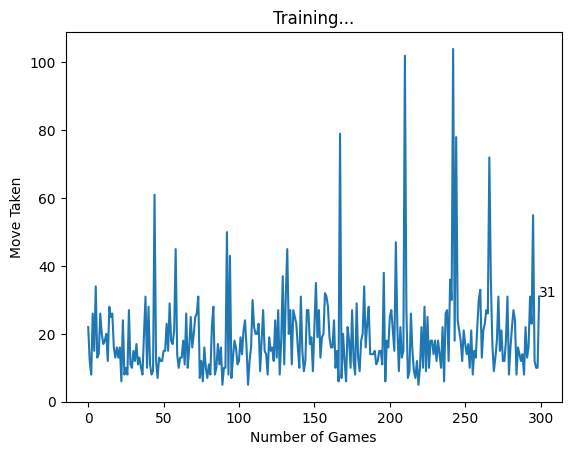

In [41]:
if __name__ == '__main__':
    env = Gomoku(rows=5, cols=5, n_to_win=3)
    N = 20            # move taken before learning
    batch_size = 5
    n_epochs = 4
    alpha = 0.0003
    agent = Agent(n_actions=env.matrix, batch_size=batch_size, 
                    alpha=alpha, n_epochs=n_epochs, 
                    input_dims=env.matrix)
    n_games = 300

    # figure_file = 'plots/cartpole.png'

    # best_score = env.reward_range[0]
    # score_history = []

    learn_iters = 0
    # avg_score = 0
    n_steps = 0

    move_taken = 0
    plot_move_taken = []
    # plot_average_move_taken = []
    total_move_taken = 0

    for i in range(n_games):
        env.reset()
        observation = env.get_state()
        done = False
        score = 0
        while not done:
            action, prob, val = agent.choose_action(observation)
            reward, done = env.take_action(action)
            observation_ = env.get_state()
            n_steps += 1
            score += reward
            agent.remember(observation, action, prob, val, reward, done)
            if n_steps % N == 0:
                agent.learn()
                learn_iters += 1
            observation = observation_

            move_taken += 1


        plot_move_taken.append(move_taken)
        total_move_taken += move_taken
        mean_move_taken = total_move_taken / n_games
        
        print('average move taken/ game: ', mean_move_taken)
        plot_as(plot_move_taken)
        move_taken = 0

        if i % 40 == 0:
                  agent.save_models()
        # score_history.append(score)
        # avg_score = np.mean(score_history[-100:])

        # if avg_score > best_score:
        #     best_score = avg_score
        #     agent.save_models()

        # print('episode', i, 'score %.1f' % score, 'avg score %.1f' % avg_score,
                # 'time_steps', n_steps, 'learning_steps', learn_iters)
    # x = [i+1 for i in range(len(score_history))]
    # plot_learning_curve(x, score_history, figure_file)